In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
print("New database created successfully.")

New database created successfully.


In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [4]:
cursor.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()
print("Table created successfully.")

Table created successfully.


In [5]:
data_to_insert = df[['PRODUCTLINE', 'QUANTITYORDERED', 'PRICEEACH']].values.tolist()

cursor.executemany("""
INSERT INTO sales (product, quantity, price)
VALUES (?, ?, ?)
""", data_to_insert)
conn.commit()

In [10]:
query = """SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product"""

In [11]:
result= pd.read_sql_query(query, conn)
print(result)

            product  total_qty     revenue
0      Classic Cars      33992  2968546.40
1       Motorcycles      11663   971086.29
2            Planes      10727   877942.21
3             Ships       8127   677940.40
4            Trains       2712   203804.26
5  Trucks and Buses      10777   947355.18
6      Vintage Cars      21069  1644212.05


<Figure size 640x480 with 0 Axes>

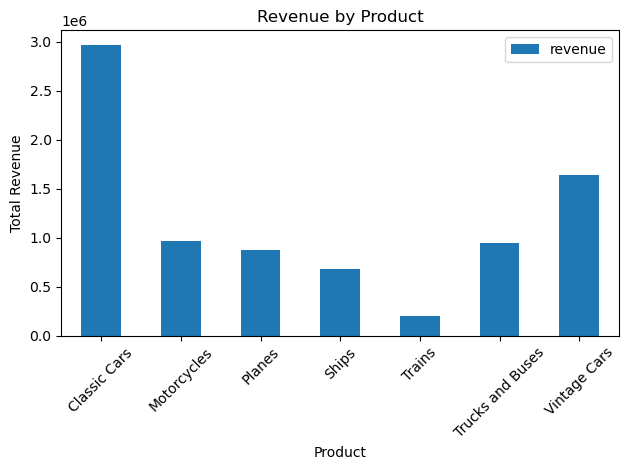

In [9]:
plt.figure()
result.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()